In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_train.shape

(550068, 12)

In [4]:
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df_test.shape

(233599, 11)

In [6]:
# Merge both data
df=df_train.append(df_test)
df.head()

C:\Users\Mantra\Anaconda2\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 62.8+ MB


In [8]:
df.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
dtype: int64

In [9]:
df.describe()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,7.836670e+05
mean,0.409777,8.079300,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,0.491793,6.522206,3.878160,5.089093,4.125510,5023.065394,1.727267e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,0.000000,2.000000,1.000000,5.000000,9.000000,5823.000000,1.001519e+06
50%,0.000000,7.000000,5.000000,9.000000,14.000000,8047.000000,1.003075e+06
75%,1.000000,14.000000,8.000000,15.000000,16.000000,12054.000000,1.004478e+06
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [10]:
#axis=1 -->drop columnwise
df.drop(['User_ID'], axis=1,inplace=True)
df.head(1)

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2


In [11]:
#df['Gender']=df['Gender'].map({'F':0,'M':1})
df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,0-17,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2
1,0-17,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2
2,0-17,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2
3,0-17,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2
4,55+,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+


In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,1,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2
1,1,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2
2,1,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2
3,1,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2
4,7,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+


In [14]:
# fixing categorical city_category
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [15]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [16]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2,0,0
1,1,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2,0,0
3,1,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2,0,0
4,7,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,0,1


In [17]:
df.drop(['City_Category'],axis=1,inplace=True)
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,NaN,NaN,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,NaN,NaN,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,NaN,P00085442,1057.0,2,0,0
4,7,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,0,1


In [18]:
df.isnull().sum()

Age                                0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
B                                  0
C                                  0
dtype: int64

In [19]:
#focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [21]:
df['Product_Category_2'].mode()[0]

8.0

In [22]:
#replace missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [23]:
df['Product_Category_2'].isnull().sum()

0

In [24]:
#prod cat 3
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [25]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [26]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [27]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,7969.0,4+,0,1


In [28]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [29]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [30]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,7969.0,4,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null uint8
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int64(4), object(2), uint8(3)
memory usage: 56.1+ MB


In [32]:
#convert object into int
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null uint8
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int32
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int32(1), int64(4), object(1), uint8(3)
memory usage: 56.1+ MB


In [33]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null uint8
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int32
B                             783667 non-null int32
C                             783667 non-null int32
dtypes: float64(3), int32(3), int64(4), object(1), uint8(1)
memory usage: 60.5+ MB


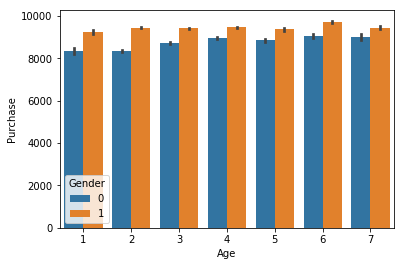

In [37]:
sns.barplot('Age','Purchase',hue='Gender',data=df)

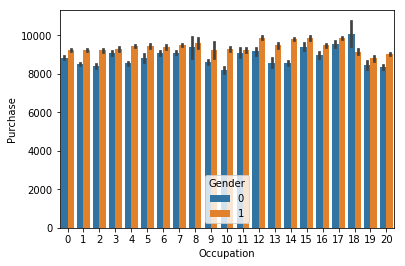

In [38]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

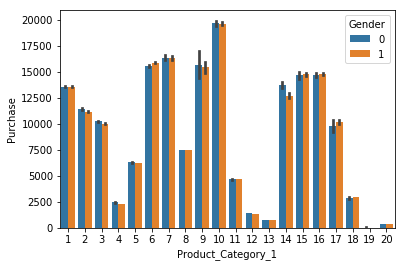

In [39]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

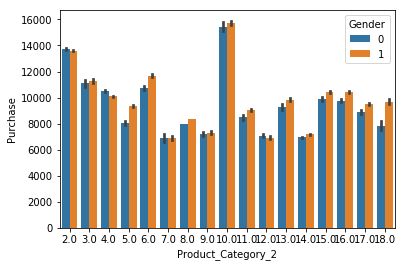

In [40]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

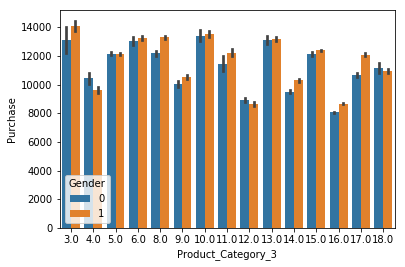

In [41]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [47]:
df.head()


,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,7969.0,4,0,1


In [44]:
df_test=df[df['Purchase'].isnull()]
df_train=df[~df['Purchase'].isnull()]

In [61]:
X=df_train.drop('Purchase',axis=1)
X.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,4,0,1


In [62]:
X.shape

(550068, 11)

In [63]:
y=df_train['Purchase']
y
y.shape

(550068,)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=42)

In [69]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

C:\Users\Mantra\Anaconda2\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [70]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

C:\Users\Mantra\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mantra\Anaconda2\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Mantra\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mantra\Anaconda2\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
#train
